In [6]:
import numpy as np
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [7]:
# Publication-ready plot configuration
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font sizes
FONT_SIZE_LABEL = 18  # Axis labels and tick labels
FONT_SIZE_TITLE = 20  # Plot titles
FONT_SIZE_LEGEND = 18  # Legend text

# Configure matplotlib parameters globally
plt.rcParams.update({
    # Font sizes
    'font.size': FONT_SIZE_LABEL,          # Base font size
    'axes.labelsize': FONT_SIZE_LABEL,     # X and Y axis labels
    'axes.titlesize': FONT_SIZE_TITLE,     # Subplot titles
    'xtick.labelsize': FONT_SIZE_LABEL,    # X tick labels
    'ytick.labelsize': FONT_SIZE_LABEL,    # Y tick labels
    'legend.fontsize': FONT_SIZE_LEGEND,   # Legend
    
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    
    # Line widths
    'axes.linewidth': 1.5,                 # Axis border width
    'grid.linewidth': 1.0,                 # Grid line width
    'lines.linewidth': 2.0,                # Plot line width
    'lines.markersize': 8,                 # Default marker size
    
    # Tick parameters
    'xtick.major.width': 1.5,              # X tick width
    'ytick.major.width': 1.5,              # Y tick width
    'xtick.major.size': 6,                 # X tick length
    'ytick.major.size': 6,                 # Y tick length
    
    # Legend
    'legend.frameon': True,                # Legend frame
    'legend.framealpha': 0.8,              # Legend transparency
    'legend.edgecolor': 'black',           # Legend border color
    
    # Figure
    'figure.dpi': 100,                     # Display resolution
    'savefig.dpi': 300,                    # Save resolution for publication
    'savefig.bbox': 'tight',               # Tight bounding box
    'savefig.pad_inches': 0.1,             # Padding when saving
    
    # Grid
    'axes.grid': False,                    # No grid by default
    'grid.alpha': 0.3,                     # Grid transparency if enabled
})

print("✓ Publication-ready plot configuration loaded")
print(f"  - Axis labels/ticks: {FONT_SIZE_LABEL}pt")
print(f"  - Titles: {FONT_SIZE_TITLE}pt")
print(f"  - Save resolution: 300 DPI")

✓ Publication-ready plot configuration loaded
  - Axis labels/ticks: 18pt
  - Titles: 20pt
  - Save resolution: 300 DPI


load models


In [8]:
import os
import json
import glob
import pandas as pd
from pathlib import Path

def load_all_model_results():
    """Load all model fit results from the model_fits directory"""
    results = []
    
    # Find all JSON files in model_fits directory
    json_files = glob.glob("model_fits/**/*.json", recursive=True)



    
    
    for file_path in json_files:
  
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)
            
            # Extract participant ID and model type from filename if not in data
            filename = os.path.basename(file_path)
            parts = filename.replace('.json', '').split('_')
            #print(parts)
            if 'participantID' not in result:
                result['participantID'] = parts[0]

            
            result['modelType'] = parts[1]+"_"+parts[3]
            
            if parts[2]!="LapseFree":
                #print("Lapse fixed model, skipping")
                continue

            # Skip results with specific model types
            excluded_models = ["gaussian_sharedPrior", "fusionOnly_sharedPrior", "probabilityMatching_sharedPrior", "switching_sharedPrior"]
            if any(model in result['modelType'] for model in excluded_models):
                # Skip this result
                os.remove(file_path)
                continue
            

            results.append(result)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return results

# Load all results
all_results = load_all_model_results()
print(f"Loaded {len(all_results)} model fit results")

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(all_results)
print(f"Participants: {sorted(df_results['participantID'].unique())}")
print(f"Models: {sorted(df_results['modelType'].unique())}\n number of models in comparison is: {len(df_results['modelType'].unique())} ")


Loaded 78 model fit results
Participants: ['all', 'as', 'dt', 'hh', 'ip', 'ln1', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Models: ['fusionOnlyLogNorm_sharedPrior', 'logLinearMismatch_sharedPrior', 'lognorm_sharedPrior', 'probabilityMatchingLogNorm_sharedPrior', 'selection_sharedPrior', 'switchingFree_sharedPrior']
 number of models in comparison is: 6 


In [9]:

participantIds=sorted(df_results['participantID'].unique())
modelTypes=sorted(df_results['modelType'].unique())
nParticipants=len(participantIds)
nModels=len(modelTypes)

import fitSaver
import os
participantID="as"
modelType="fusionOnlyLogNorm"

# simulate



 Load data

In [10]:
# import bootstrapperSaveLoad functions
import matplotlib.pyplot as plt
from bootstrapperSaveLoad import saveBootstrappedParams, loadBootstrappedParams
import loadResults
import os
import json
import seaborn as sns

# parameter recovery

In [11]:
# Load Parameter Recovery Results from JSON files
import numpy as np
import pandas as pd
import json
import os
from glob import glob

def load_recovery_results(base_dir="parameter_recovery_results", modelType="lognorm"):
    """
    Load parameter recovery results from saved JSON files.
    
    Args:
        base_dir: directory containing the recovery results
        modelType: the model type to load results for
    
    Returns:
        List of recovery result dictionaries
    """
    recovery_results = []
    
    # Find all recovery JSON files
    pattern = os.path.join(base_dir, "*", f"*_{modelType}_recovery.json")
    json_files = glob(pattern)
    
    print(f"Found {len(json_files)} recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            recovery_results.append(result)
            participantID = result.get('participantID', 'unknown')
            n_successful = result.get('n_successful', 0)
            print(f"Loaded {participantID}: {n_successful} successful recoveries")
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return recovery_results

# Load the recovery results
recovery_results = load_recovery_results(modelType="lognorm")

print(f"\nTotal participants with recovery results: {len(recovery_results)}")

# Display summary
if recovery_results:
    print("\nSummary:")
    for result in recovery_results:
        pid = result['participantID']
        true_p = np.array(result['true_params'])
        recovered_p = np.array(result['recovered_params_mean'])
        print(f"{pid}: True params: {np.round(true_p, 3)}, Recovered (mean): {np.round(recovered_p, 3)}")

Found 5 recovery result files
Loaded as: 20 successful recoveries
Loaded dt: 20 successful recoveries
Loaded hh: 20 successful recoveries
Loaded ip: 20 successful recoveries
Loaded ln1: 20 successful recoveries

Total participants with recovery results: 5

Summary:
as: True params: [0.052 0.229 0.5   0.647 0.596 0.096 0.02 ], Recovered (mean): [0.076 0.224 0.493 0.601 0.59  0.115 0.038]
dt: True params: [0.3   0.198 0.306 0.565 0.527 0.23  0.219], Recovered (mean): [0.249 0.322 0.402 0.651 0.573 0.166 0.189]
hh: True params: [1.00e-03 1.09e-01 2.49e-01 9.56e-01 1.43e+00 3.60e-02 5.90e-02], Recovered (mean): [0.016 0.201 0.205 0.896 1.722 0.054 0.071]
ip: True params: [0.133 0.251 0.814 0.171 0.807 0.089 0.011], Recovered (mean): [0.153 0.245 1.74  0.59  0.751 0.096 0.034]
ln1: True params: [1.250e-01 4.450e-01 8.010e-01 8.030e-01 4.078e+00 3.000e-03 5.400e-02], Recovered (mean): [0.176 0.42  0.736 0.792 1.98  0.059 0.113]


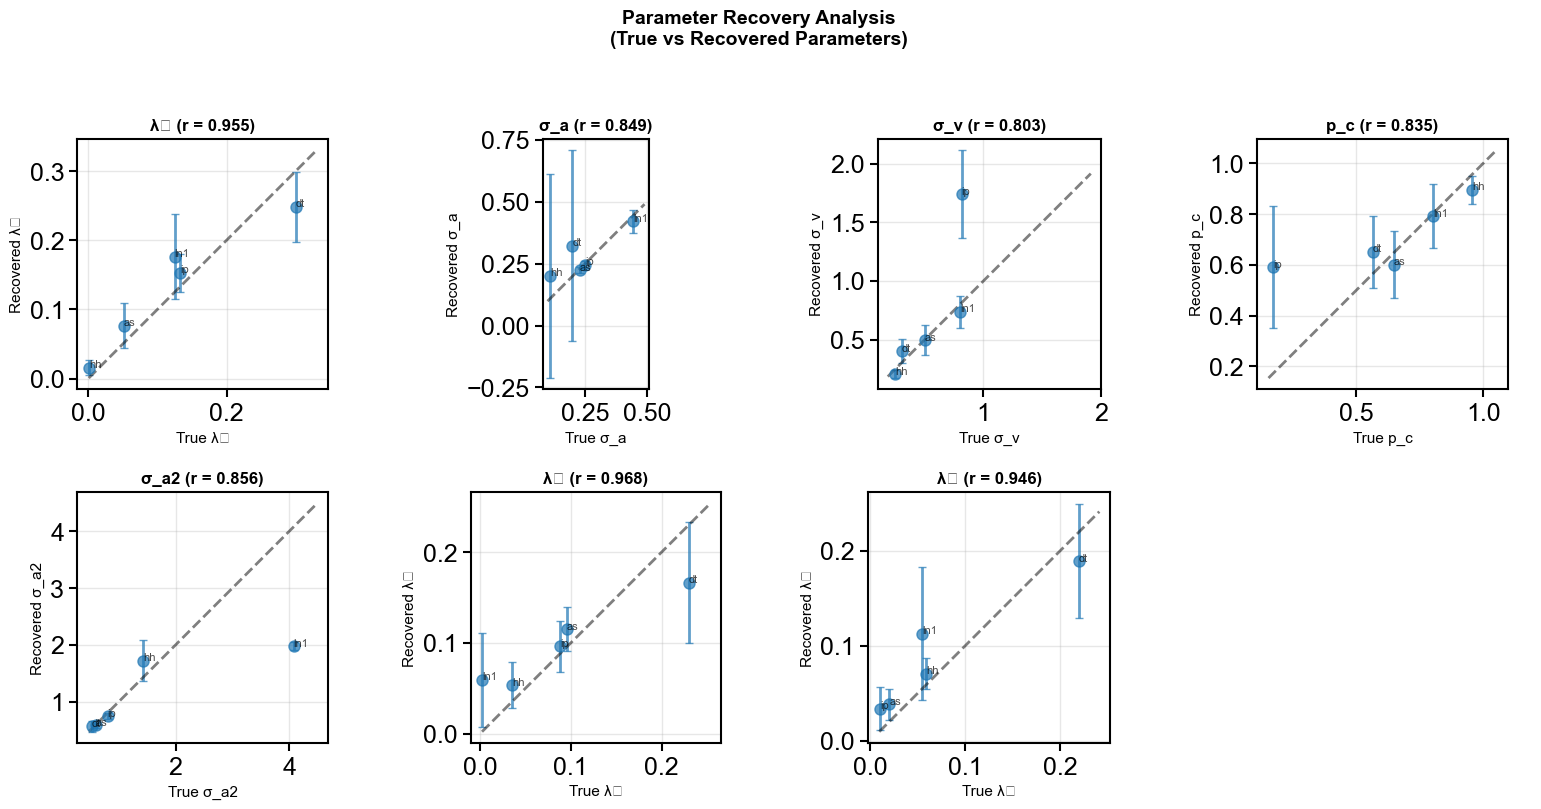


PARAMETER RECOVERY SUMMARY
Parameter    Mean Corr    Mean Bias    Mean SE     
----------------------------------------------------------------------
λ₁           0.955        0.0118       0.0363      
σ_a          0.849        0.0360       0.1742      
σ_v          0.803        0.1811       0.1549      
p_c          0.835        0.0775       0.1390      
σ_a2         0.856        -0.3645      0.1258      
λ₂           0.968        0.0075       0.0390      
λ₃           0.946        0.0163       0.0372      


In [12]:
# Plot Parameter Recovery Results

def plot_parameter_recovery(recovery_results, param_names=None):
    """
    Visualize parameter recovery: true vs recovered parameters
    """
    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']
    
    n_params = len(recovery_results[0]['true_params'])
    n_participants = len(recovery_results)
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for p_idx in range(min(n_params, 7)):
        ax = axes[p_idx]
        
        true_vals = [r['true_params'][p_idx] for r in recovery_results]
        recovered_vals = [r['recovered_params_mean'][p_idx] for r in recovery_results]
        recovered_stds = [r['recovered_params_std'][p_idx] for r in recovery_results]
        
        # Scatter plot with error bars
        ax.errorbar(true_vals, recovered_vals, yerr=recovered_stds, 
                   fmt='o', capsize=3, alpha=0.7, markersize=8)
        
        # Add participant labels
        for i, r in enumerate(recovery_results):
            ax.annotate(r['participantID'], (true_vals[i], recovered_vals[i]), 
                       fontsize=8, alpha=0.7)
        
        # Unity line
        all_vals = true_vals + recovered_vals
        min_val, max_val = min(all_vals) * 0.9, max(all_vals) * 1.1
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Unity')
        
        # Calculate correlation
        corr = np.corrcoef(true_vals, recovered_vals)[0, 1]
        
        ax.set_xlabel(f'True {param_names[p_idx]}', fontsize=11)
        ax.set_ylabel(f'Recovered {param_names[p_idx]}', fontsize=11)
        ax.set_title(f'{param_names[p_idx]} (r = {corr:.3f})', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal', adjustable='box')
    
    # Hide unused subplot
    if n_params < 8:
        axes[-1].axis('off')
    
    plt.suptitle('Parameter Recovery Analysis\n(True vs Recovered Parameters)', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*70)
    print("PARAMETER RECOVERY SUMMARY")
    print("="*70)
    print(f"{'Parameter':<12} {'Mean Corr':<12} {'Mean Bias':<12} {'Mean SE':<12}")
    print("-"*70)
    
    for p_idx in range(n_params):
        true_vals = np.array([r['true_params'][p_idx] for r in recovery_results])
        recovered_vals = np.array([r['recovered_params_mean'][p_idx] for r in recovery_results])
        recovered_stds = np.array([r['recovered_params_std'][p_idx] for r in recovery_results])
        
        corr = np.corrcoef(true_vals, recovered_vals)[0, 1]
        bias = np.mean(recovered_vals - true_vals)
        mean_se = np.mean(recovered_stds)
        
        param_name = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx}'
        print(f"{param_name:<12} {corr:<12.3f} {bias:<12.4f} {mean_se:<12.4f}")

# Uncomment to plot after running recovery
plot_parameter_recovery(recovery_results)

# Bootstrap analysis

In [14]:
# Bootstrap Analysis for Parameter Uncertainty - FIXED VERSION
# This gives us confidence intervals for fitted parameters
import numpy as np
from tqdm import tqdm
def run_bootstrap_analysis(participantIds, modelType="lognorm", n_boot=50, nSimul_boot=300, maxiter=200):
    """
    Parametric bootstrap for parameter uncertainty estimation.
    For each participant:
    1. Simulate datasets from fitted parameters
    2. Re-fit each simulated dataset (with proper optimization)
    3. Compute CI from distribution of recovered parameters
    
    KEY FIX: We need to:
    - Add noise to starting point to avoid getting stuck at the same optimum
    - Use more iterations
    - Potentially use random restarts
    """
    from scipy.optimize import minimize
    
    bootstrap_results = []
    
    for participantID in tqdm(participantIds, desc="Bootstrap Analysis"):
        # Load data and fitted parameters
        data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
        mc_fitter = monteCarloClass.OmerMonteCarlo(data)
        mc_fitter.modelName = modelType
        mc_fitter.freeP_c = False
        mc_fitter.sharedLambda = False
        mc_fitter.dataName = dataName
        mc_fitter.nSimul = nSimul_boot
        
        try:
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            best_params = np.array(res['fittedParams'])
            mc_fitter.modelFit = best_params
        except Exception as e:
            print(f"Could not load results for {participantID}: {e}")
            continue
        
        boot_samples = []
        
        for b in tqdm(range(n_boot), desc=f"  Bootstrap {participantID}", leave=False):
            # Simulate data using fitted parameters
            sim_df = mc_fitter.simulateMonteCarloData(best_params, mc_fitter.data)
            
            # Create fitter for bootstrap dataset
            boot_fitter = monteCarloClass.OmerMonteCarlo(sim_df)
            boot_fitter.modelName = modelType
            boot_fitter.freeP_c = False
            boot_fitter.sharedLambda = False
            boot_fitter.nSimul = nSimul_boot
            boot_fitter.nStart = 1
            boot_fitter.optimizationMethod = 'scipy'
            
            # FIT THE MODEL PROPERLY (not just minimize from best_params)
            # This will use proper bounds and optimization
            try:
                boot_params = boot_fitter.fitCausalInferenceMonteCarlo(boot_fitter.groupedData)
                if boot_params is not None:
                    boot_samples.append(boot_params)
            except Exception as e:
                print(f"  Bootstrap {b} failed: {e}")
                continue
        
        if len(boot_samples) > 0:
            boot_samples = np.array(boot_samples)
            
            # Calculate statistics
            ci_low = np.percentile(boot_samples, 2.5, axis=0)
            ci_high = np.percentile(boot_samples, 97.5, axis=0)
            
            bootstrap_results.append({
                'participantID': participantID,
                'best_params': best_params.tolist(),
                'boot_mean': np.mean(boot_samples, axis=0).tolist(),
                'boot_std': np.std(boot_samples, axis=0).tolist(),
                'ci_low': ci_low.tolist(),
                'ci_high': ci_high.tolist(),
                'n_successful': len(boot_samples),
                'boot_samples': boot_samples.tolist()
            })
            
            print(f"\n{participantID} bootstrap variance: {np.round(np.std(boot_samples, axis=0), 4)}")
            
            # Save individual bootstrap results
            save_dir = os.path.join("bootstrap_results", participantID)
            os.makedirs(save_dir, exist_ok=True)
            save_path = os.path.join(save_dir, f"{participantID}_{modelType}_bootstrap.json")
            with open(save_path, 'w') as f:
                json.dump(bootstrap_results[-1], f, indent=2)
            print(f"Saved bootstrap results for {participantID}")
    
    return bootstrap_results

# Run bootstrap - REDUCED n_boot for testing (increase for final analysis)
# This will take longer but give proper uncertainty estimates
bootstrap_results = run_bootstrap_analysis(
    participantIds[1:3],  # Start with just 2 participants to test
    modelType="lognorm", 
    n_boot=10,  # Reduced for testing - use 50-100 for publication
    nSimul_boot=300
)

Bootstrap Analysis:   0%|          | 0/2 [00:00<?, ?it/s]

Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3463.2760408316253
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3465.8060092420847

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [02:01<00:00, 121.23s/it]


✓ Attempt 1: New best LL = 3319.523196

✅ Best result from 1 attempts:
  → Final parameters: [0.08553999 0.25077878 0.51552815 0.72301131 0.60356946 0.1120968
 0.02610427]
  → Final log-likelihood: 3319.523196
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3416.0141150453874
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3420.337170882211

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:36<00:00, 96.09s/it]


✓ Attempt 1: New best LL = 3274.606562

✅ Best result from 1 attempts:
  → Final parameters: [0.04473493 0.21216698 0.35266731 0.36888914 0.92615679 0.09583265
 0.09960586]
  → Final log-likelihood: 3274.606562
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3473.894016708192
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3480.832246241978

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:52<00:00, 112.57s/it]


✓ Attempt 1: New best LL = 3343.120483

✅ Best result from 1 attempts:
  → Final parameters: [0.12074497 0.23620091 0.53360855 0.72857451 0.61795999 0.14987498
 0.01123298]
  → Final log-likelihood: 3343.120483
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3461.863031565343
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3471.5192350915117

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:33<00:00, 93.06s/it]


✓ Attempt 1: New best LL = 3318.588311

✅ Best result from 1 attempts:
  → Final parameters: [0.00451565 0.23479224 0.52145378 0.52925961 0.77573309 0.035822
 0.05665574]
  → Final log-likelihood: 3318.588311
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3449.3589201635696
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3447.412058343633

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:52<00:00, 113.00s/it]


✓ Attempt 1: New best LL = 3309.092824

✅ Best result from 1 attempts:
  → Final parameters: [0.05017933 0.20841899 0.41322263 0.56920488 0.51160423 0.21465057
 0.05222967]
  → Final log-likelihood: 3309.092824
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3431.6247857681988
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3429.4156153802437

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:50<00:00, 110.64s/it]


✓ Attempt 1: New best LL = 3293.055749

✅ Best result from 1 attempts:
  → Final parameters: [0.04746718 0.22204825 0.52742804 0.54379932 0.95425849 0.12501543
 0.03164071]
  → Final log-likelihood: 3293.055749
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3474.6801612859617
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3468.7702593518106

Starting 1 optimization attempts using 'scipy'...
Model is lognorm




Optimization Attempts: 100%|██████████| 1/1 [01:54<00:00, 114.83s/it]


✓ Attempt 1: New best LL = 3361.264349

✅ Best result from 1 attempts:
  → Final parameters: [0.06159762 0.27689955 0.50567412 0.63680156 0.54679482 0.01526091
 0.13328955]
  → Final log-likelihood: 3361.264349
Data bounds: t_min=0.021, t_max=0.954
=== DEBUGGING FITTING COMPONENTS ===
Data bounds: t_min=0.021, t_max=0.954
Grouped data shape: (419, 11)
Configuration: sharedLambda=False, freeP_c=False
Model: lognorm
Expected parameter length: 7
Test params length: 7, values: [0.1 0.5 0.5 0.5 0.8 0.1 0.1]
✓ Parameter extraction tested for 3 conditions
Test likelihood: 3444.912398392418
=== ALL COMPONENTS TESTED SUCCESSFULLY ===
Fitting with shared p_c parameter across SNR conditions.
Bounds shape: (7, 2)
Using fixed t_min=0.021, t_max=0.954 from data
Testing likelihood function with reasonable parameters...
Test likelihood evaluation: 3442.4492460983156

Starting 1 optimization attempts using 'scipy'...
Model is lognorm



Bootstrap Analysis:   0%|          | 0/2 [13:11<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Inspect bootstrap results structure
if bootstrap_results:
    print(f"Number of participants: {len(bootstrap_results)}")
    for r in bootstrap_results[:2]:  # Check first 2 participants
        print(f"\nParticipant: {r['participantID']}")
        print(f"  Best params: {np.round(r['best_params'], 4)}")
        print(f"  Boot mean:   {np.round(r['boot_mean'], 4)}")
        print(f"  Boot std:    {np.round(r['boot_std'], 4)}")
        print(f"  CI low:      {np.round(r['ci_low'], 4)}")
        print(f"  CI high:     {np.round(r['ci_high'], 4)}")
        print(f"  N successful: {r['n_successful']}")
        
        # Check if all boot_samples are the same
        boot_samples = np.array(r['boot_samples'])
        print(f"  Boot samples shape: {boot_samples.shape}")
        print(f"  Boot samples variance per param: {np.var(boot_samples, axis=0)}")
        
        # Check first few boot samples
        print(f"  First 3 boot samples:")
        for i in range(min(3, len(boot_samples))):
            print(f"    Sample {i}: {np.round(boot_samples[i], 4)}")

In [ ]:
# Plot Bootstrap Results

def plot_bootstrap_results(bootstrap_results, param_names=None):
    """
    Visualize bootstrap parameter distributions and confidence intervals
    """
    if param_names is None:
        param_names = ['λ₁', 'σ_a', 'σ_v', 'p_c', 'σ_a2', 'λ₂', 'λ₃']
    
    n_params = len(bootstrap_results[0]['best_params'])
    n_participants = len(bootstrap_results)
    
    # Figure 1: Parameter estimates with 95% CI
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for p_idx in range(min(n_params, 7)):
        ax = axes[p_idx]
        
        participants = [r['participantID'] for r in bootstrap_results]
        best_vals = [r['best_params'][p_idx] for r in bootstrap_results]
        ci_lows = [r['ci_low'][p_idx] for r in bootstrap_results]
        ci_highs = [r['ci_high'][p_idx] for r in bootstrap_results]
        
        # Error bars showing 95% CI
        errors = [[best_vals[i] - ci_lows[i] for i in range(len(best_vals))],
                  [ci_highs[i] - best_vals[i] for i in range(len(best_vals))]]
        
        x_pos = np.arange(len(participants))
        ax.errorbar(x_pos, best_vals, yerr=errors, fmt='o', capsize=5, 
                   capthick=2, markersize=8, color='steelblue')
        
        ax.set_xticks(x_pos)
        ax.set_xticklabels(participants, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel(param_names[p_idx], fontsize=11)
        ax.set_title(f'{param_names[p_idx]} with 95% CI', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
    
    if n_params < 8:
        axes[-1].axis('off')
    
    plt.suptitle('Parameter Estimates with 95% Bootstrap Confidence Intervals', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Bootstrap distributions for one example participant
    if len(bootstrap_results) > 0 and 'boot_samples' in bootstrap_results[0]:
        example = bootstrap_results[0]
        boot_samples = np.array(example['boot_samples'])
        
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()
        
        for p_idx in range(min(n_params, 7)):
            ax = axes[p_idx]
            
            ax.hist(boot_samples[:, p_idx], bins=15, density=True, 
                   alpha=0.7, color='steelblue', edgecolor='white')
            ax.axvline(example['best_params'][p_idx], color='red', 
                      linestyle='--', linewidth=2, label='Best fit')
            ax.axvline(example['ci_low'][p_idx], color='orange', 
                      linestyle=':', linewidth=2, label='95% CI')
            ax.axvline(example['ci_high'][p_idx], color='orange', 
                      linestyle=':', linewidth=2)
            
            ax.set_xlabel(param_names[p_idx], fontsize=11)
            ax.set_ylabel('Density', fontsize=11)
            ax.set_title(f'{param_names[p_idx]} Distribution', fontsize=12)
            if p_idx == 0:
                ax.legend(fontsize=9)
        
        if n_params < 8:
            axes[-1].axis('off')
        
        plt.suptitle(f'Bootstrap Parameter Distributions (Participant: {example["participantID"]})', 
                    fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
    
    # Print summary table
    print("\n" + "="*90)
    print("BOOTSTRAP PARAMETER ESTIMATES (95% CI)")
    print("="*90)
    
    for r in bootstrap_results:
        print(f"\nParticipant: {r['participantID']} (n_boot = {r['n_successful']})")
        print("-"*70)
        print(f"{'Parameter':<12} {'Estimate':<12} {'95% CI Low':<12} {'95% CI High':<12} {'SE':<12}")
        print("-"*70)
        
        for p_idx in range(len(r['best_params'])):
            param_name = param_names[p_idx] if p_idx < len(param_names) else f'Param {p_idx}'
            print(f"{param_name:<12} {r['best_params'][p_idx]:<12.4f} "
                  f"{r['ci_low'][p_idx]:<12.4f} {r['ci_high'][p_idx]:<12.4f} "
                  f"{r['boot_std'][p_idx]:<12.4f}")

# Uncomment to plot after running bootstrap
plot_bootstrap_results(bootstrap_results)

## Model Recovery Analysis

Model recovery tests whether we can correctly identify the *generating model* when we fit multiple competing models to simulated data. This creates a **confusion matrix** showing:
- Rows: True (generating) model
- Columns: Best-fitting model (by AIC/BIC)

A good model recovery shows a diagonal pattern (each model recovers itself).

In [ ]:
# Model Recovery Functions
import numpy as np
import pandas as pd
import json
import os
from glob import glob
from tqdm import tqdm

def run_model_recovery(participantIds, models_to_test, n_recovery=5, nSimul=500, nStarts=1,
                       save_dir="model_recovery_results"):
    """
    Model Recovery Analysis:
    For each generating model:
      1. Load fitted parameters
      2. Simulate synthetic data
      3. Fit ALL competing models to the synthetic data
      4. Record which model has the best AIC/BIC
    
    Args:
        participantIds: list of participant IDs
        models_to_test: list of model names to test (e.g., ['lognorm', 'fusionOnlyLogNorm', 'switching'])
        n_recovery: number of recovery iterations per participant-model combination
        nSimul: Monte Carlo simulations for fitting
        nStarts: optimization starting points
        save_dir: directory to save intermediate results
    
    Returns:
        List of recovery results with generating model, fitted models, and AICs
    """
    os.makedirs(save_dir, exist_ok=True)
    
    all_recovery_results = []
    
    for generating_model in tqdm(models_to_test, desc="Generating Models"):
        for participantID in tqdm(participantIds, desc=f"Participants ({generating_model})", leave=False):
            
            # Check if results already exist
            result_path = os.path.join(save_dir, f"{participantID}_{generating_model}_model_recovery.json")
            if os.path.exists(result_path):
                print(f"Loading existing results for {participantID} - {generating_model}")
                with open(result_path, 'r') as f:
                    existing_result = json.load(f)
                all_recovery_results.append(existing_result)
                continue
            
            # Load original data structure
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            
            # Load fitted parameters for the generating model
            mc_gen = monteCarloClass.OmerMonteCarlo(data)
            mc_gen.modelName = generating_model
            mc_gen.freeP_c = False
            mc_gen.sharedLambda = False
            mc_gen.dataName = dataName
            mc_gen.nSimul = nSimul
            mc_gen.nStart = nStarts
            
            try:
                res_gen = loadResults.loadFitResults(mc_gen, dataName, modelName=generating_model)
                true_params = np.array(res_gen['fittedParams'])
            except Exception as e:
                print(f"Could not load {generating_model} for {participantID}: {e}")
                continue
            
            recovery_iterations = []
            
            for iter_idx in range(n_recovery):
                # Simulate data from generating model
                sim_data = mc_gen.simulateMonteCarloData(true_params, data)
                
                # Fit all competing models to simulated data
                model_fits = {}
                
                for fit_model in models_to_test:
                    mc_fit = monteCarloClass.OmerMonteCarlo(sim_data)
                    mc_fit.modelName = fit_model
                    mc_fit.freeP_c = False
                    mc_fit.sharedLambda = False
                    mc_fit.nSimul = nSimul
                    mc_fit.nStart = nStarts
                    mc_fit.optimizationMethod = 'scipy'
                    mc_fit.dataName = f"{participantID}_recovery"
                    
                    try:
                        fitted_params = mc_fit.fitCausalInferenceMonteCarlo(mc_fit.groupedData)
                        if fitted_params is not None:
                            # Calculate log-likelihood and AIC
                            nLL = mc_fit.nLLMonteCarloCausal(fitted_params, mc_fit.groupedData)
                            LL = -nLL
                            n_params = len(fitted_params)
                            AIC = 2 * n_params - 2 * LL
                            BIC = n_params * np.log(len(sim_data)) - 2 * LL
                            
                            model_fits[fit_model] = {
                                'fittedParams': fitted_params.tolist(),
                                'logLikelihood': LL,
                                'AIC': AIC,
                                'BIC': BIC,
                                'nParams': n_params
                            }
                    except Exception as e:
                        print(f"  Fit failed for {fit_model}: {e}")
                        continue
                
                if len(model_fits) > 0:
                    # Find best model by AIC
                    best_model_aic = min(model_fits.keys(), key=lambda m: model_fits[m]['AIC'])
                    best_model_bic = min(model_fits.keys(), key=lambda m: model_fits[m]['BIC'])
                    
                    recovery_iterations.append({
                        'iteration': iter_idx,
                        'model_fits': model_fits,
                        'best_model_aic': best_model_aic,
                        'best_model_bic': best_model_bic
                    })
            
            if len(recovery_iterations) > 0:
                result = {
                    'participantID': participantID,
                    'generating_model': generating_model,
                    'true_params': true_params.tolist(),
                    'n_iterations': len(recovery_iterations),
                    'iterations': recovery_iterations,
                    'best_model_counts_aic': {},
                    'best_model_counts_bic': {}
                }
                
                # Count best model selections
                for m in models_to_test:
                    result['best_model_counts_aic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_aic'] == m
                    )
                    result['best_model_counts_bic'][m] = sum(
                        1 for it in recovery_iterations if it['best_model_bic'] == m
                    )
                
                all_recovery_results.append(result)
                
                # Save intermediate result
                with open(result_path, 'w') as f:
                    json.dump(result, f, indent=2)
                print(f"Saved {participantID} - {generating_model}")
    
    return all_recovery_results


def load_model_recovery_results(save_dir="model_recovery_results"):
    """Load all model recovery results from saved JSON files."""
    results = []
    json_files = glob(os.path.join(save_dir, "*_model_recovery.json"))
    
    print(f"Found {len(json_files)} model recovery result files")
    
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                result = json.load(f)
            results.append(result)
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return results

print("Model recovery functions defined.")

In [ ]:
# Run Model Recovery (COMPUTATIONALLY EXPENSIVE - run overnight or on cluster)
# Uncomment and run when ready

# Models to compare in recovery analysis
# models_to_test = ['lognorm', 'fusionOnlyLogNorm', 'switching', 'probabilityMatchingLogNorm']

# # Run model recovery for a subset of participants first to test
# model_recovery_results = run_model_recovery(
#     participantIds[:2],  # Start with 2 participants
#     models_to_test=models_to_test,
#     n_recovery=5,  # 5 iterations per model-participant
#     nSimul=500,
#     nStarts=1
# )

# For now, try to load any existing results
model_recovery_results = load_model_recovery_results()
print(f"\nLoaded {len(model_recovery_results)} model recovery results")

In [ ]:
# Plot Model Recovery Confusion Matrix

def plot_model_recovery_matrix(model_recovery_results, criterion='aic'):
    """
    Create a confusion matrix showing model recovery performance.
    
    Args:
        model_recovery_results: list of recovery results from run_model_recovery
        criterion: 'aic' or 'bic' for model selection
    """
    if len(model_recovery_results) == 0:
        print("No model recovery results to plot!")
        return None
    
    # Get unique models
    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))
    
    # Get all fitted models from first result
    first_with_iterations = next((r for r in model_recovery_results if r['iterations']), None)
    if first_with_iterations is None:
        print("No results with iterations found!")
        return None
    
    fitted_models = sorted(first_with_iterations['iterations'][0]['model_fits'].keys())
    
    # Build confusion matrix
    # Rows: generating model, Columns: best-fitting model
    confusion_counts = np.zeros((len(generating_models), len(fitted_models)))
    
    for result in model_recovery_results:
        gen_idx = generating_models.index(result['generating_model'])
        counts_key = f'best_model_counts_{criterion}'
        
        if counts_key in result:
            for fit_model, count in result[counts_key].items():
                if fit_model in fitted_models:
                    fit_idx = fitted_models.index(fit_model)
                    confusion_counts[gen_idx, fit_idx] += count
    
    # Normalize to proportions (per row)
    row_sums = confusion_counts.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    confusion_props = confusion_counts / row_sums
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Raw counts
    ax1 = axes[0]
    im1 = ax1.imshow(confusion_counts, cmap='Blues', aspect='auto')
    
    ax1.set_xticks(range(len(fitted_models)))
    ax1.set_yticks(range(len(generating_models)))
    ax1.set_xticklabels(fitted_models, rotation=45, ha='right', fontsize=10)
    ax1.set_yticklabels(generating_models, fontsize=10)
    ax1.set_xlabel('Best-Fitting Model (by ' + criterion.upper() + ')', fontsize=12)
    ax1.set_ylabel('Generating Model', fontsize=12)
    ax1.set_title('Model Recovery: Raw Counts', fontsize=14, fontweight='bold')
    
    # Add text annotations
    for i in range(len(generating_models)):
        for j in range(len(fitted_models)):
            text = ax1.text(j, i, f'{int(confusion_counts[i, j])}',
                           ha='center', va='center', fontsize=11,
                           color='white' if confusion_counts[i, j] > confusion_counts.max()/2 else 'black')
    
    plt.colorbar(im1, ax=ax1, label='Count')
    
    # Plot 2: Proportions (recovery rate)
    ax2 = axes[1]
    im2 = ax2.imshow(confusion_props, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    ax2.set_xticks(range(len(fitted_models)))
    ax2.set_yticks(range(len(generating_models)))
    ax2.set_xticklabels(fitted_models, rotation=45, ha='right', fontsize=10)
    ax2.set_yticklabels(generating_models, fontsize=10)
    ax2.set_xlabel('Best-Fitting Model (by ' + criterion.upper() + ')', fontsize=12)
    ax2.set_ylabel('Generating Model', fontsize=12)
    ax2.set_title('Model Recovery: Proportions', fontsize=14, fontweight='bold')
    
    # Add text annotations
    for i in range(len(generating_models)):
        for j in range(len(fitted_models)):
            text = ax2.text(j, i, f'{confusion_props[i, j]:.2f}',
                           ha='center', va='center', fontsize=11,
                           color='white' if confusion_props[i, j] > 0.5 else 'black')
    
    # Highlight diagonal
    for i in range(min(len(generating_models), len(fitted_models))):
        if generating_models[i] in fitted_models:
            j = fitted_models.index(generating_models[i])
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, 
                                 edgecolor='gold', linewidth=3)
            ax2.add_patch(rect)
    
    plt.colorbar(im2, ax=ax2, label='Proportion')
    
    plt.suptitle('Model Recovery Analysis\n(Can we identify the true generating model?)', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*70)
    print(f"MODEL RECOVERY SUMMARY (criterion: {criterion.upper()})")
    print("="*70)
    
    diagonal_recovery = []
    for i, gen_model in enumerate(generating_models):
        if gen_model in fitted_models:
            j = fitted_models.index(gen_model)
            recovery_rate = confusion_props[i, j]
            diagonal_recovery.append(recovery_rate)
            print(f"{gen_model}: {recovery_rate*100:.1f}% correctly recovered")
        else:
            print(f"{gen_model}: Not in fitted models")
    
    if diagonal_recovery:
        print(f"\nMean diagonal recovery rate: {np.mean(diagonal_recovery)*100:.1f}%")
        print(f"This indicates {'GOOD' if np.mean(diagonal_recovery) > 0.6 else 'MODERATE' if np.mean(diagonal_recovery) > 0.4 else 'POOR'} model discriminability")
    
    return confusion_props, generating_models, fitted_models

# # Plot if results exist
# if len(model_recovery_results) > 0:
#     confusion_matrix, gen_models, fit_models = plot_model_recovery_matrix(
#         model_recovery_results, criterion='aic'
#     )
# else:
#     print("No model recovery results yet. Run the model recovery analysis first.")

In [ ]:
# Additional Model Recovery Metrics: ΔAIC distributions and model discriminability

def plot_model_recovery_details(model_recovery_results):
    """
    Plot detailed model recovery metrics:
    1. ΔAIC distributions for each generating model
    2. Model discriminability (how different are AICs between models)
    """
    if len(model_recovery_results) == 0:
        print("No model recovery results to analyze!")
        return
    
    # Collect ΔAIC data
    generating_models = sorted(set(r['generating_model'] for r in model_recovery_results))
    
    # Get fitted models
    first_with_iterations = next((r for r in model_recovery_results if r['iterations']), None)
    if first_with_iterations is None:
        return
    
    fitted_models = sorted(first_with_iterations['iterations'][0]['model_fits'].keys())
    
    # Create ΔAIC data for each generating model
    fig, axes = plt.subplots(1, len(generating_models), figsize=(5*len(generating_models), 5))
    if len(generating_models) == 1:
        axes = [axes]
    
    for gen_idx, gen_model in enumerate(generating_models):
        ax = axes[gen_idx]
        
        # Collect all AICs relative to the generating model's AIC
        delta_aics = {m: [] for m in fitted_models}
        
        for result in model_recovery_results:
            if result['generating_model'] != gen_model:
                continue
            
            for iteration in result['iterations']:
                model_fits = iteration['model_fits']
                
                # Get AIC of the true generating model
                if gen_model in model_fits:
                    true_aic = model_fits[gen_model]['AIC']
                else:
                    continue
                
                # Calculate ΔAIC for each fitted model
                for fit_model in fitted_models:
                    if fit_model in model_fits:
                        delta_aic = model_fits[fit_model]['AIC'] - true_aic
                        delta_aics[fit_model].append(delta_aic)
        
        # Box plot of ΔAIC distributions
        data_to_plot = [delta_aics[m] for m in fitted_models if len(delta_aics[m]) > 0]
        labels_to_plot = [m for m in fitted_models if len(delta_aics[m]) > 0]
        
        if len(data_to_plot) > 0:
            bp = ax.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
            
            # Color boxes
            colors = plt.cm.Set3(np.linspace(0, 1, len(labels_to_plot)))
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
            
            # Highlight the true model (should be centered at 0)
            if gen_model in labels_to_plot:
                true_idx = labels_to_plot.index(gen_model)
                bp['boxes'][true_idx].set_facecolor('lightgreen')
                bp['boxes'][true_idx].set_edgecolor('darkgreen')
                bp['boxes'][true_idx].set_linewidth(2)
        
        ax.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='True model')
        ax.axhline(y=2, color='orange', linestyle=':', alpha=0.7, label='ΔAIC=2 threshold')
        ax.axhline(y=-2, color='orange', linestyle=':', alpha=0.7)
        
        ax.set_xlabel('Fitted Model', fontsize=11)
        ax.set_ylabel('ΔAIC (relative to true model)', fontsize=11)
        ax.set_title(f'Generating: {gen_model}', fontsize=12, fontweight='bold')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        if gen_idx == 0:
            ax.legend(loc='upper right', fontsize=9)
    
    plt.suptitle('Model Recovery: ΔAIC Distributions\n(Values < 0 indicate better fit than true model)', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Summary: Model discriminability
    print("\n" + "="*70)
    print("MODEL DISCRIMINABILITY ANALYSIS")
    print("="*70)
    print("\nFor each generating model, how often do competing models fit BETTER (ΔAIC < -2)?")
    print("-"*70)
    
    for gen_model in generating_models:
        print(f"\nGenerating model: {gen_model}")
        
        for result in model_recovery_results:
            if result['generating_model'] != gen_model:
                continue
            
            n_total = len(result['iterations'])
            for fit_model in fitted_models:
                if fit_model == gen_model:
                    continue
                
                n_better = 0
                for iteration in result['iterations']:
                    if gen_model in iteration['model_fits'] and fit_model in iteration['model_fits']:
                        true_aic = iteration['model_fits'][gen_model]['AIC']
                        fit_aic = iteration['model_fits'][fit_model]['AIC']
                        if fit_aic < true_aic - 2:  # substantially better
                            n_better += 1
                
                pct = (n_better / n_total * 100) if n_total > 0 else 0
                if pct > 10:  # Only report if non-trivial
                    print(f"  {fit_model} fits better {pct:.1f}% of the time")

# # Plot detailed metrics if results exist
# if len(model_recovery_results) > 0:
#     plot_model_recovery_details(model_recovery_results)
# else:
#     print("Run model recovery analysis first to see detailed metrics.")